In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# **PART ONE:**

**Graphe :**


#**PART TWO :**
---



**GraphG3:**

In [ ]:
GraphG3 ={
    'a':['b','d','f'],
    'b':['a','c'],
    'c':['b','d','e'],
    'd':['a','c','e','f'],
    'e':['c','d','f'],
    'f':['a','d','e']
}
GraphG3

{'a': ['b', 'd', 'f'],
 'b': ['a', 'c'],
 'c': ['b', 'd', 'e'],
 'd': ['a', 'c', 'e', 'f'],
 'e': ['c', 'd', 'f'],
 'f': ['a', 'd', 'e']}

In [ ]:
GraphG3['a']

['b', 'd', 'f']

In [ ]:
noeuds = GraphG3.keys()
noeuds

dict_keys(['a', 'b', 'c', 'd', 'e', 'f'])

In [ ]:
print("le grapheG3 est : \n")
for noeud in noeuds:
  print(noeud ,"->" ,GraphG3[noeud])

le grapheG3 est : 

a -> ['b', 'd', 'f']
b -> ['a', 'c']
c -> ['b', 'd', 'e']
d -> ['a', 'c', 'e', 'f']
e -> ['c', 'd', 'f']
f -> ['a', 'd', 'e']


**Representation GraphG3 (not directed )**

In [ ]:
H = nx.Graph(GraphG3)
list(H.edges())


[('a', 'b'),
 ('a', 'd'),
 ('a', 'f'),
 ('b', 'c'),
 ('c', 'd'),
 ('c', 'e'),
 ('d', 'e'),
 ('d', 'f'),
 ('e', 'f')]

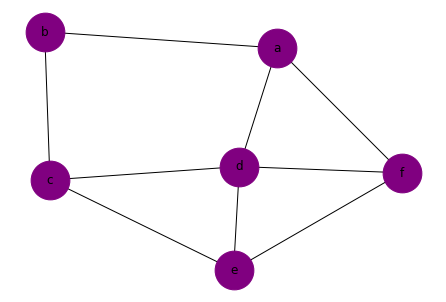

In [ ]:
nx.draw(H,with_labels=True,node_size=1500,node_color='purple')#,arrows=True)

**GraphG2 :**

In [ ]:
GraphG2 ={
    'a':[],
    'b':['a','c','d'],
    'c':['a','b','d'],
    'd':['d']
}
noeuds = GraphG2.keys()
noeuds

dict_keys(['a', 'b', 'c', 'd'])

In [ ]:
GraphG2

{'a': [], 'b': ['a', 'c', 'd'], 'c': ['a', 'b', 'd'], 'd': ['d']}

In [ ]:
print("le grapheG2 est : \n")
for noeud in noeuds:
  print(noeud ,"->" ,GraphG2[noeud])

le grapheG2 est : 

a -> []
b -> ['a', 'c', 'd']
c -> ['a', 'b', 'd']
d -> ['d']


In [ ]:
M = nx.Graph(GraphG2)
list(H.edges())

[('a', 'b'),
 ('a', 'd'),
 ('a', 'f'),
 ('b', 'c'),
 ('c', 'd'),
 ('c', 'e'),
 ('d', 'e'),
 ('d', 'f'),
 ('e', 'f')]

**REPRESENTATION DIRECTED GRAPH G2**

In [ ]:
M = nx.DiGraph(GraphG2)
list(M.edges())

[('b', 'a'),
 ('b', 'c'),
 ('b', 'd'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'd'),
 ('d', 'd')]

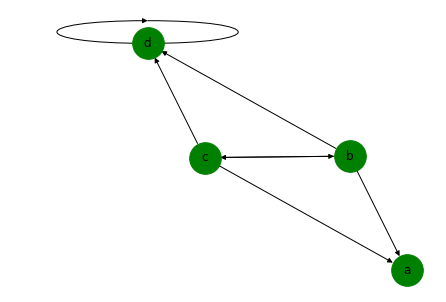

In [ ]:
nx.draw(M,with_labels=True,node_size=1000,node_color='green')#,arrows=True)

#**PARTIE 3 :**
---



**Construction d'un graphe orienté/non orienté :**




In [ ]:
class Graphe:
  def __init__(self,noeuds,oriented=False,weighted=False):
    self.nodes = noeuds
    self.adj_list={}
    self.oriented=oriented
    self.weighted=weighted

    for node in self.nodes:
      self.adj_list[node]=[]
      

  #Affiche le graphe

  def affichGraph(self):
    for node in self.nodes:
      print(node,"->",self.adj_list[node])
  
  #Ajouter un noeud

  def add_node(self,noeud):   
    for node in self.nodes:
      if noeud == node :
        return "node existe déjà"
    self.nodes.append(noeud)
    self.adj_list[noeud]=[]
    print('noeud',noeud,'ajouté')
  
  #recherche noeud
  def searchf_node(self,noeud):
    for node in self.nodes:
      if node == noeud :
        msg="le noeud {} : {}".format(node,self.adj_list[node])
        return msg
    print('node does not exist')
  
  #Ajouter le lien

  def add_edge(self,u,v,weight=1):
    if not self.weighted: # si le graphe n'est pas pondéré
       if v in (self.nodes):
         self.adj_list[u].append(v)
         print("edge added")
       else:
         print("edge cannot be added , the node ",v,"does not exist")
       if not self.oriented :
         self.adj_list[v].append(u)
    else: # si le graphe est pondéré
       if v in (self.nodes):
         self.adj_list[u].append([v,weight])
         print("edge added")
       else:
         print("edge cannot be added , the node ",v,"does not exist")
       if not self.oriented :
         self.adj_list[v].append([u,weight])
    

  #Supprimer un noeud avec ses liens

  def delete_node(self,noeud):
       if noeud not in self.nodes:
         return ("node doesn't exist")
       else : 
         self.adj_list.pop(noeud)
         self.nodes.remove(noeud) #if exist delete it from the nodes list and adjencency list
         print("node deleted ")
         for node in self.nodes :
           if noeud in self.adj_list[node] :
              self.adj_list[node].remove(noeud)   #remove it from adjencency list ,removelinks with other nodes

  #degré d'un noeud

  def degree_node(self,noeud):
    deg = len(self.adj_list[noeud])
    return deg

  #degré Graphe

  def degree_graph(self):
    return max(self.degree_node(node)for node in self.nodes)

  #total d'aretes / arcs (edges)

  def total_edges(self):
    sum = 0
    for node in self.nodes:
      sum += len(self.adj_list[node])
    if self.oriented :
      return sum
    else :
      return sum //2

  #nombre aretes/arcs possibles dans un graphe

  def number_edges_possibles(self):
       nb_sommets = len(self.nodes)
       res = nb_sommets * (nb_sommets -1 )
       if self.oriented :
         return res
       else :
         return res//2
    
  #Densité du graphe 

  def density_graph(self):
    return self.total_edges() / self.number_edges_possibles()



  def find_path_dfs(self,start,end): #une 2eme methode pour trouver un chemin en utilisant dfs
      visited = []
      stack = [[start]]
      while stack :
        path = stack.pop()
        node = path[-1]
        if node in visited:
          continue
        visited.append(node)
        if node == end :
          return path
        else :
          adj_nodes = self.adj_list[node]
          for node2 in adj_nodes:
            new_path =path.copy()
            new_path.append(node2)
            stack.append(new_path)


  def find_path(self, start, end, path=[]):
    size_adj = len(self.adj_list[start])
    path = path + [start]
    if start == end:
        return path
    adj_list1=[]
    for i in range(size_adj):
      adj_list1=self.adj_list[start][i][0]
    if len(adj_list1)==0:
      return ("PATH DOESN T EXIST")
    else :
        for node in adj_list1: #for node in self.adj_list[start]:
            if node not in path:
                newpath = self.find_path(node, end, path)
                if newpath:
                    return newpath
    return ("None path doesn t exist ")

  #shortest path
  def find_shortest_path(self,start, end, path =[]): 
    size_adj = len(self.adj_list[start])
    path = path + [start]
    if start == end:
        return path
    shortest = None
    adj_list_shortest=[]
    for i in range(size_adj):
      adj_list_shortest=self.adj_list[start][i][0]  
    for node in adj_list_shortest:
        if node not in path:
            newpath = self.find_shortest_path(node, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest


  #une 2eme methode chemin le plus court  
  def find_shortest_path_pondere(self, start, end):
     dist = {start: [start]}
     q = deque(start)
     while len(q): 
         at = q.popleft()
         for next in self.adj_list[at]:
             if next not in dist:
                 dist[next] = [dist[at], next]
                 q.append(next)
     return dist.get(end)

  

  """ #dfs
  def dfs(self, d, visited_vertex):
        visited_vertex[d] = True    
        print(d, end='')
        for i in self.adj_list[d]:
            if not visited_vertex[i]:
                self.dfs(i, visited_vertex)

  def fill_order(self, d, visited_vertex, stack):
        visited_vertex[d] = True
        for i in self.graph[d]: 
            if not visited_vertex[i]:
                self.fill_order(i, visited_vertex, stack)
        stack = stack.append(d)

    # transpose the matrix
  def transpose(self):
        g =Graphe(self.nodes)

        for i in self.nodes:
            for j in self.adj_list[i]:
                g.add_edge(j, i)
              
        return g

    # Print stongly connected components
     def print_scc(self):
        stack = []
        visited_vertex = [False] * (self.nodes)

        for i in range(self.nodes):
            if not visited_vertex[i]:
                self.fill_order(i, visited_vertex, stack)

        gr = self.transpose()

        visited_vertex = [False] * (self.nodes)

        while stack:
            i = stack.pop()
            if not visited_vertex[i]:
                gr.dfs(i, visited_vertex)
                print("") """
 



        
        
        

 

**TEST**

In [ ]:
noeuds3=['a','b','c','d']
print("le graphe3 avant d'ajouter les liens:\n")
graph3=Graphe(noeuds3,oriented=True)
graph3.affichGraph()

le graphe3 avant d'ajouter les liens:

a -> []
b -> []
c -> []
d -> []


In [ ]:
graph3.add_edge('a','s') #affiche erreur disant que le noeud s n'existe pas
graph3.affichGraph()

edge cannot be added , the node  s does not exist
a -> []
b -> []
c -> []
d -> []


In [ ]:
graph3.adj_list

{'a': [], 'b': [], 'c': [], 'd': []}

In [ ]:
graph3.nodes

['a', 'b', 'c', 'd']

In [ ]:
graph3.add_node('a')

'node existe déjà'

In [ ]:
graph3.add_node('L')
graph3.add_node('e')

noeud L ajouté
noeud e ajouté


In [ ]:
graph3.add_edge('a','d')
graph3.add_edge('b','e')
graph3.add_edge('L','e')
graph3.add_edge('a','L')
graph3.add_edge('a','c')
graph3.add_edge('L','d')
graph3.add_edge('d','c')
graph3.add_edge('c','b')

edge added
edge added
edge added
edge added
edge added
edge added
edge added
edge added


In [ ]:
graph3.add_edge('a','d',22)
graph3.add_edge('b','e',14)
graph3.add_edge('L','e',13)
graph3.add_edge('a','L',9)
graph3.add_edge('a','c')
graph3.add_edge('L','d',3)
graph3.add_edge('d','c',7)
graph3.add_edge('c','b',20)

edge added
edge added
edge added
edge added
edge added
edge added
edge added


In [ ]:
print("\nle graphe3 aprés l'ajout des lien :\n")
graph3.affichGraph()


le graphe3 aprés l'ajout des lien :

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
graphe_pondere ={
 'a': [['d', 22], ['L', 9], ['c', 1]],
 'b': [['e', 14]],
 'c': [['b', 20]],
 'd': [['c', 7]],
 'L': [['e', 13], ['d', 3]],
 'e': ['a']}

In [ ]:
graph3.adj_list

{'a': [['d', 22], ['L', 9], ['c', 1]],
 'b': [['e', 14]],
 'c': [['b', 20]],
 'd': [['c', 7]],
 'L': [['e', 13], ['d', 3]],
 'e': []}

In [ ]:
graph3.nodes

['a', 'b', 'c', 'd', 'L', 'e']

In [ ]:
graph3.

['d', 'L', 'c']

In [ ]:
graph3.searchf_node('ss') #dit que le noeud existe pas

node does not exist


In [ ]:
graph3.searchf_node('c')

"le noeud c : ['b']"

delete noeud

In [ ]:
graph3.affichGraph()

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
graph3.affichGraph()

In [ ]:
graph3.delete_node('a')

node deleted 


In [ ]:
graph3.affichGraph()

b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
graph3.delete_node('lyna')

node deleted 


In [ ]:
graph3.affichGraph()

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
graph3.adj_list["a"]

**Degré d'un noeud et Densité d'un graphe**

In [ ]:
graph3.degree_node('lyna') #degré noeud

2

In [ ]:
graph3.affichGraph()

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
def dencity(graph3):
  return max(graph3.Degree_node(node)for node in graph3.nodes)

In [ ]:
graph3.degree_graph()

3

In [ ]:
graph3.density_graph()

0.26666666666666666

**Find path :**

In [ ]:
graph3.affichGraph()

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
for i in range(len(graph3.adj_list['a']))  :
   print(graph3.adj_list['a'][i][0])

d
L
c


In [ ]:
graph3.find_path_dfs('a','d')

['a', 'L', 'd']

In [ ]:
graph3.affichGraph()

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
graph3.adj_list[0]

In [ ]:
graph3.nodes

['a', 'b', 'c', 'd', 'lyna', 'e']

In [ ]:
graph3.find_path_dfs("a","b")

['a', 'c', 'b']

In [ ]:
graph3.find_path("d","a")

'PATH DOESN T EXIST'

In [ ]:
graph3.find_path("a","e")

['a', 'c', 'b', 'e']

In [ ]:
graph3.find_path("a","e")

['a', 'd', 'c', 'b', 'e']

In [ ]:
graph3.find_shortest_path("a","e")

['a', 'c', 'b', 'e']

In [ ]:
graph3.find_shortest_path_off("a","e")

['a', 'c', 'b', 'e']

In [ ]:
graph3.find_shortest_path()

In [ ]:
graph3.affichGraph()

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
graph3.find_shortest_path3("a","e")

[[['a'], 'L'], 'e']

In [ ]:
graph3.find_shortest_path_off("e","a")

In [ ]:
graph3.find_shortest_path("e","a")

weighted test


In [ ]:
graph3.find_path("d","a")

'PATH DOESN T EXIST'

In [ ]:
graph3.affichGraph()

a -> ['d', 'L', 'c']
b -> ['e']
c -> ['b']
d -> ['c']
L -> ['e', 'd']
e -> []


In [ ]:
graph3.find_path_dfs("a","c")

['a', 'c']

In [ ]:
graph3.find_shortest_path_off("a","e") 

['a', 'c', 'b', 'e']

GEEKS FOR GEEKS PROGRAM

In [ ]:
graph = {
    'a': ['c'],
    'b': ['d'],
    'c': ['e'],
    'd': ['a', 'd'],
    'e': ['b', 'c']
}

In [ ]:
def find_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    for node in graph[start]:
        if node not in path:
            newpath = find_path(graph, node, end, path)
            if newpath:
                return newpath

In [ ]:
print(find_path(graph, 'd', 'c'))

['d', 'a', 'c']


In [ ]:
find_path(graph, 'd', 'c')

['d', 'a', 'c']

test find all paths

In [ ]:
graph3.find_path("a","e")

['a', 'c', 'b', 'e']

In [ ]:
graph3.find_path_off("a","e")

['a', 'd', 'c', 'b', 'e']

In [ ]:
paths= graph3.find_all_paths("a","e")
paths

[['a', 'd', 'c', 'b', 'e'],
 ['a', 'L', 'e'],
 ['a', 'L', 'd', 'c', 'b', 'e'],
 ['a', 'c', 'b', 'e']]

In [ ]:
min(paths, key=len) #shortest path

['a', 'L', 'e']

# **Representation graphique a partir de la classe**

In [ ]:
import networkx as nx
g3 = graph3.adj_list
g3

{'a': ['d', 'L', 'c'],
 'b': ['e'],
 'c': ['b'],
 'd': ['c'],
 'L': ['e', 'd'],
 'e': []}

In [ ]:
g3 =nx.DiGraph(g3)

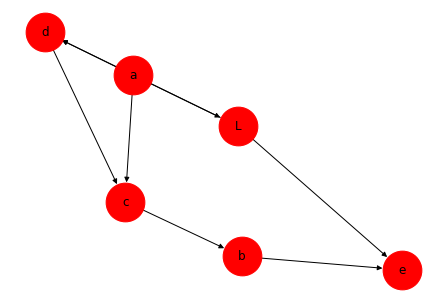

In [ ]:
nx.draw(g3,with_labels=True,node_size=1500,node_color='red')#,arrows=True)

In [ ]:
class Vertex:
	def __init__(self, n):
		self.name = n

class Graph:
	vertices = {}
	edges = []
	edge_indices = {}
	
	def add_vertex(self, vertex):
		if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
			self.vertices[vertex.name] = vertex
			for row in self.edges:
				row.append(0)
			self.edges.append([0] * (len(self.edges)+1))
			self.edge_indices[vertex.name] = len(self.edge_indices)
			return True
		else:
			return False
	
	def add_edge(self, u, v, weight=1):
		if u in self.vertices and v in self.vertices:
			self.edges[self.edge_indices[u]][self.edge_indices[v]] = weight
			self.edges[self.edge_indices[v]][self.edge_indices[u]] = weight
			return True
		else:
			return False
			
	def print_graph(self):
		for v, i in sorted(self.edge_indices.items()):
			print(v + ' ', end='')
			for j in range(len(self.edges)):
				print(self.edges[i][j], end='')
			print(' ')    

g = Graph()
# print(str(len(g.vertices)))
a = Vertex('A')
g.add_vertex(a)
g.add_vertex(Vertex('B'))
for i in range(ord('A'), ord('K')):
	g.add_vertex(Vertex(chr(i)))

edges = ['AB', 'AE', 'BF', 'CG', 'DE', 'DH', 'EH', 'FG', 'FI', 'FJ', 'GJ', 'HI']
for edge in edges:
	g.add_edge(edge[:1], edge[1:])

g.print_graph()